# GCN Model Evaluation

In this notebook, we will evaluate the trained in demo notebook `0 - train_gcn_surrogate_model_from_scratch.ipynb` GCN surrogate model for predicting the performance of quantum circuits on `ghz_a`. 
The evaluation involves loading the trained GCN model, evaluating its performance, and visualizing key metrics like the distribution of errors and fidelity predictions.

## 1. Import Dependencies

First, we import the necessary dependencies for our evaluation.

In [1]:
# Suppress PyTorch Warnings and ensure proper dependency loading
import warnings
import os
import sys

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..')) # Go two levels up from the notebook location to reach project root

if project_root not in sys.path:
    sys.path.insert(0, project_root)
print("Project root set to:", project_root)

Project root set to: C:\SQuASH


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter

from config import DeviceConfig, get_default_model_config_by_search_space, PathConfig, QCConfig, \
    get_model_config_from_path
from evaluate.evaluate_model import run_gcn_evaluation
from util.config_utils import get_gate_set_and_features_by_name
from util.data_loader import load_data

## 2. Setup Configuration

We define paths and other configurations necessary for loading the model and dataset.

In [3]:
# Initialize device configuration and path configuration
device_config = DeviceConfig()
device = device_config.device
path_config = PathConfig()
color = 'skyblue'

# Define the gate set and dataset name
gate_set = 'gate_set_ghz_a'
data_set_name = 'test_ghz_a_squash'
model_name = 'demo_gcn_ghz_a_2025-04-19_15-14-17'

# Get gate set features
gate_mapping, _ = get_gate_set_and_features_by_name(gate_set)

## 3. Load and Evaluate GCN Model

We now proceed to evaluate the GCN model, which includes loading the model, running the evaluation, and computing metrics such as fidelity and error.

=== GNN Evaluation ===
demo_gcn_ghz_a_2025-04-19_15-14-17
Data successfully loaded from C:\SQuASH\data/processed_data/gcn_processed_data\test_ghz_a_squash.pt
Loaded 82926 circuits for GNN evaluation.
--- Metrics for GNN ---
Samples: 82926
MSE:     0.0097
MAE:     0.0570
RMSE:    0.0986
R^2:     0.7053
Corr:    0.8507
Spearman: 0.7819
Accuracy (|err| <= 0.1): 86.44%

[INFO] Start analyzing circuits
Found 4147 circuits among the top 5.0% error.

Gate usage across circuits:
  cx: 11040 occurrences
  h: 4431 occurrences
  ry: 4400 occurrences
  rz: 4148 occurrences
  id: 3891 occurrences
  rx: 3533 occurrences


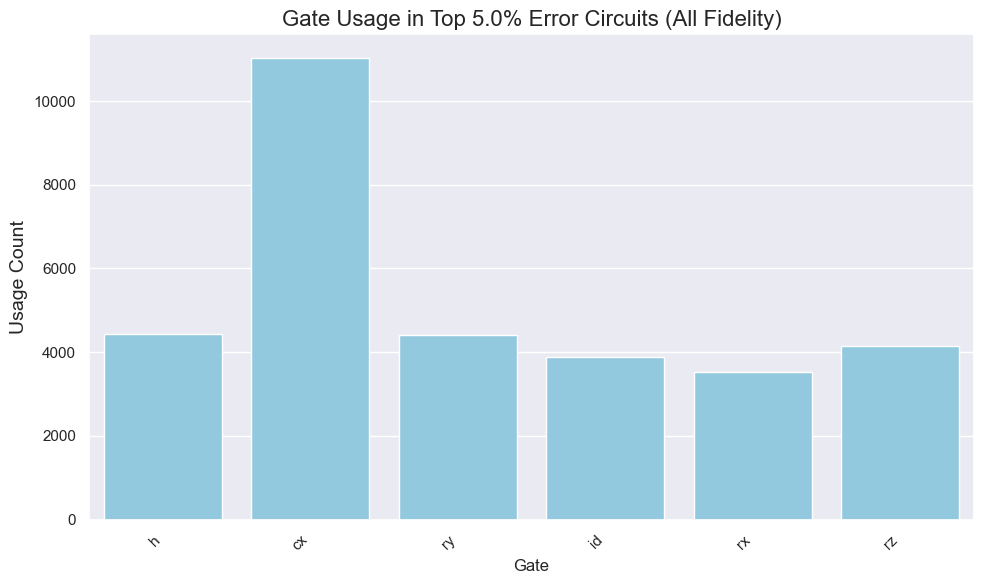

[INFO] Saved problem circuit details to: C:\SQuASH\surrogate_models\trained_models\demo_gcn_ghz_a_2025-04-19_15-14-17\problem_circuits_all_details.csv
[INFO] Saved gate usage summary to: C:\SQuASH\surrogate_models\trained_models\demo_gcn_ghz_a_2025-04-19_15-14-17\problem_circuits_all_gate_usage.csv
[INFO] Start analyzing circuits
Found 246 circuits among the top 5.0% error (actual fidelity >= 0.9).

Gate usage across circuits:
  cx: 755 occurrences
  h: 328 occurrences
  id: 266 occurrences
  rz: 200 occurrences
  rx: 195 occurrences
  ry: 145 occurrences


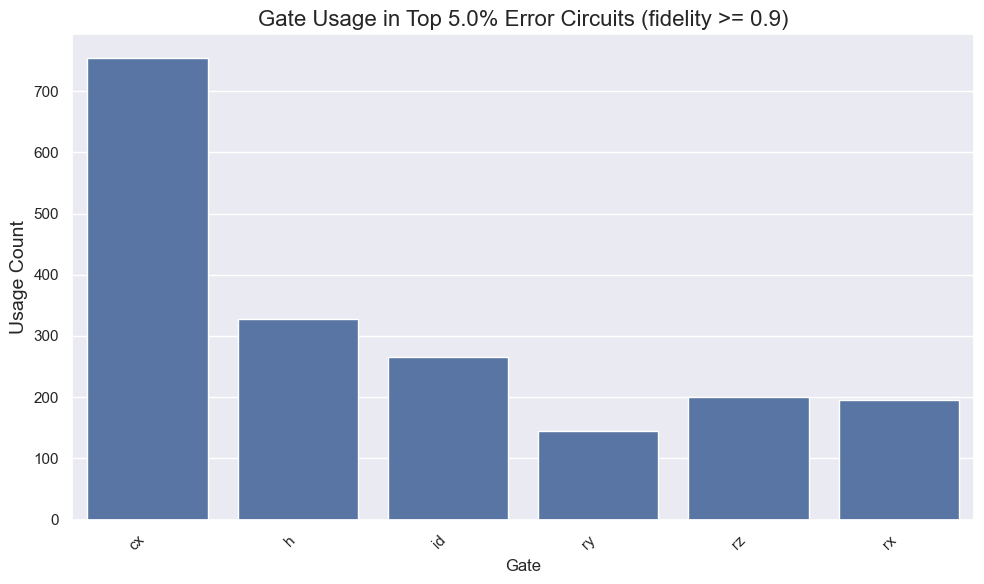

[INFO] Saved problem circuit details to: C:\SQuASH\surrogate_models\trained_models\demo_gcn_ghz_a_2025-04-19_15-14-17\problem_circuits_hifid_details.csv
[INFO] Saved gate usage summary to: C:\SQuASH\surrogate_models\trained_models\demo_gcn_ghz_a_2025-04-19_15-14-17\problem_circuits_hifid_gate_usage.csv


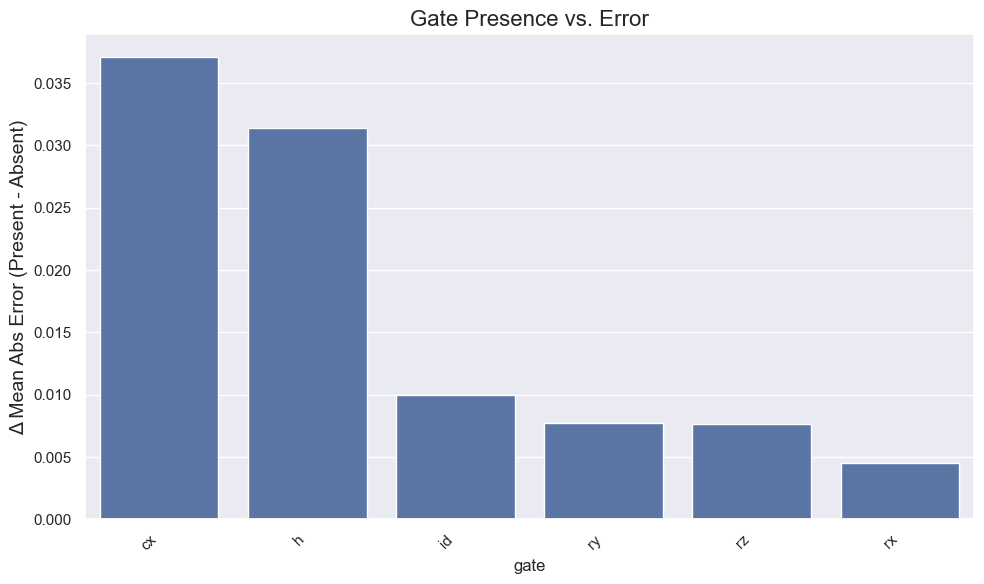

[INFO] Saved plots and gate feature stats to: C:\SQuASH\surrogate_models\trained_models\demo_gcn_ghz_a_2025-04-19_15-14-17\gate_feature_stats.csv

Gate Feature Stats (presence vs. error):
  gate  count_present  mean_err_present  mean_err_absent  diff_mean_err  \
0   cx          64257          0.065372         0.028313       0.037060   
1    h          40011          0.073288         0.041871       0.031417   
2   id          40093          0.062184         0.052204       0.009979   
4   ry          48184          0.060270         0.052534       0.007736   
5   rz          44930          0.060547         0.052869       0.007677   
3   rx          42154          0.059264         0.054719       0.004545   

   corr_err_presence  
0           0.192407  
1           0.195143  
2           0.061989  
4           0.047446  
5           0.047550  
3           0.028246  
[INFO] Saved error-by-fidelity plot to: C:\SQuASH\surrogate_models\trained_models\demo_gcn_ghz_a_2025-04-19_15-14-17\error_by

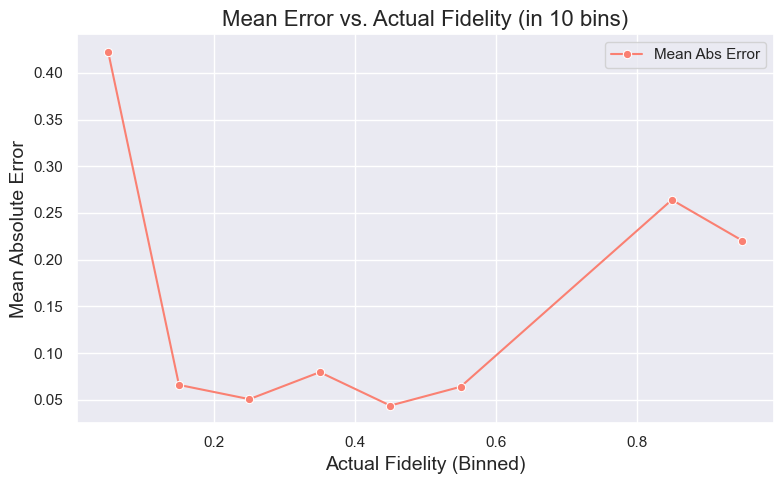


Average error by fidelity bin:
    fidelity_bin  mean_abs_error  count bin_mid
0  (-0.001, 0.1]        0.422309    104  0.0495
1     (0.1, 0.2]        0.065855   1993  0.1500
2     (0.2, 0.3]        0.050587  22165  0.2500
3     (0.3, 0.4]        0.079510     13  0.3500
4     (0.4, 0.5]        0.043718  53739  0.4500
5     (0.5, 0.6]        0.063861      3  0.5500
6     (0.6, 0.7]             NaN      0  0.6500
7     (0.7, 0.8]             NaN      0  0.7500
8     (0.8, 0.9]        0.264091      2  0.8500
9     (0.9, 1.0]        0.220427   4907  0.9500


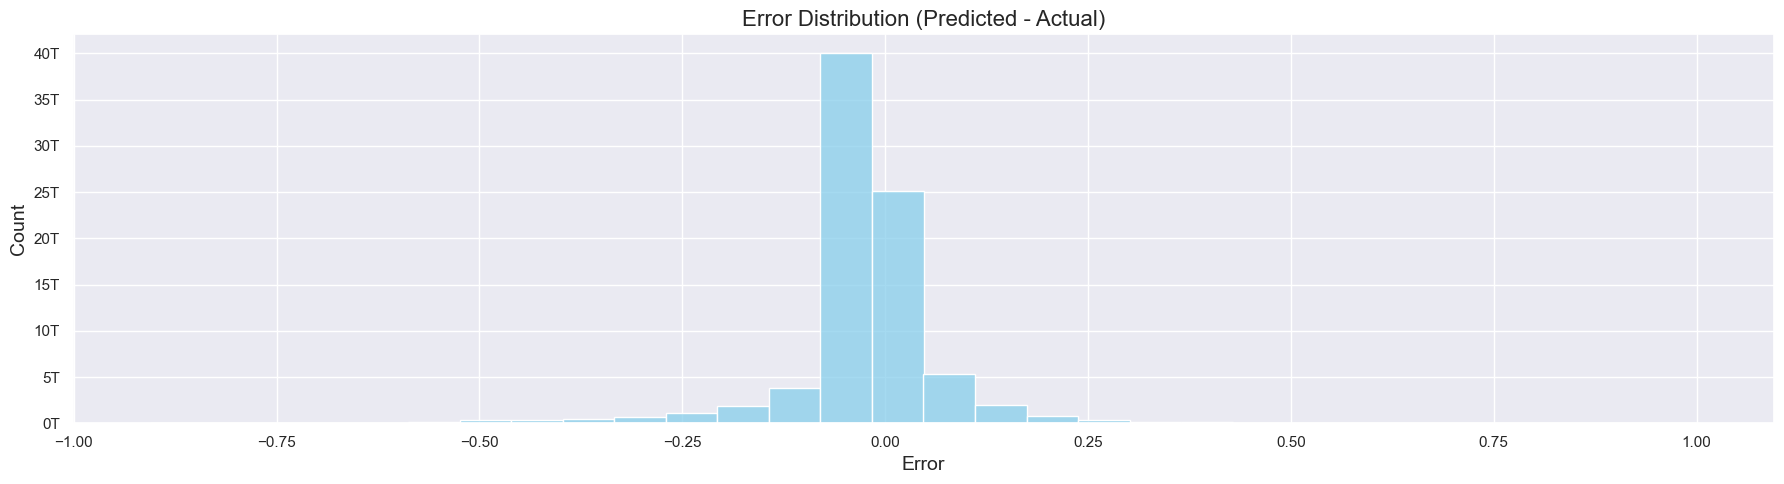

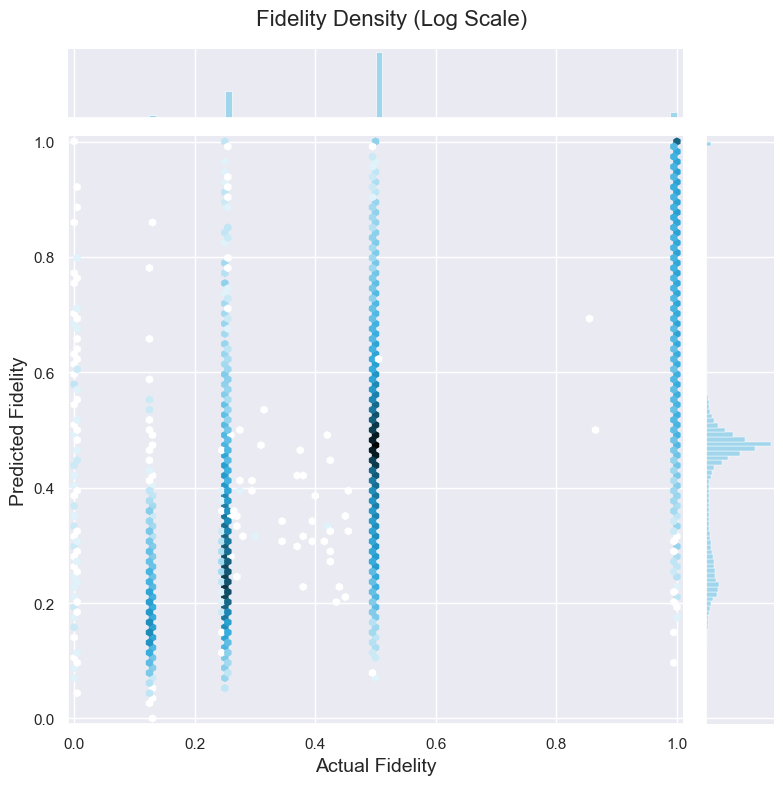

In [4]:
metrics_gnn = run_gcn_evaluation(device=device, model_name=model_name, data_set_name=data_set_name, gate_mapping=gate_mapping, path_config=path_config, color=color)